### Load Libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from imblearn.datasets import make_imbalance
import sklearn.cluster as cluster

In [122]:
#load the data
df = pd.read_csv('water_potability.csv')
# to visualize all the columns at once.
pd.set_option('display.max_columns', None)

In [123]:
#fetching first 5 rows
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.896419,222.256293,8870.902966,6.011342,332.002630,425.226862,10.847737,NaN,3.700946,0
1,6.581878,272.982745,37169.444400,8.114731,416.083481,351.476839,15.129334,79.261026,4.201663,0
2,6.755146,231.260131,18536.698650,8.757133,342.548014,385.114648,13.888834,79.302436,5.162730,0
3,9.445130,145.805402,13168.529160,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
4,9.024845,128.096691,19859.676480,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2352 non-null   float64
 1   Hardness         2756 non-null   float64
 2   Solids           2756 non-null   float64
 3   Chloramines      2756 non-null   float64
 4   Sulfate          2097 non-null   float64
 5   Conductivity     2756 non-null   float64
 6   Organic_carbon   2756 non-null   float64
 7   Trihalomethanes  2616 non-null   float64
 8   Turbidity        2756 non-null   float64
 9   Potability       2756 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 215.4 KB


In [125]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2352.000000,2756.000000,2756.000000,2756.000000,2097.000000,2756.000000,2756.000000,2616.000000,2756.000000,2756.000000
mean,7.080067,196.151699,22069.760138,7.137598,334.135731,425.989538,14.258509,66.359321,3.978196,0.463716
std,1.581204,32.798936,8765.333234,1.613689,42.470222,80.696891,3.317371,16.192175,0.781521,0.498772
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.097554,176.563031,15736.815717,6.145785,307.667123,365.488164,12.060510,55.713440,3.444882,0.000000
50%,7.038721,196.464101,21036.774735,7.147329,333.564587,421.258539,14.210358,66.676436,3.958576,0.000000
75%,8.037513,216.657847,27370.435700,8.148563,360.843312,482.415933,16.496714,77.294780,4.519866,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [126]:
# correlation matrix
corr = df.corr()
corr['Potability'].sort_values(ascending=True)

Sulfate           -0.034772
Organic_carbon    -0.027368
Turbidity         -0.011743
Hardness          -0.009952
Conductivity      -0.006981
ph                -0.003729
Trihalomethanes    0.010439
Chloramines        0.018294
Solids             0.033342
Potability         1.000000
Name: Potability, dtype: float64

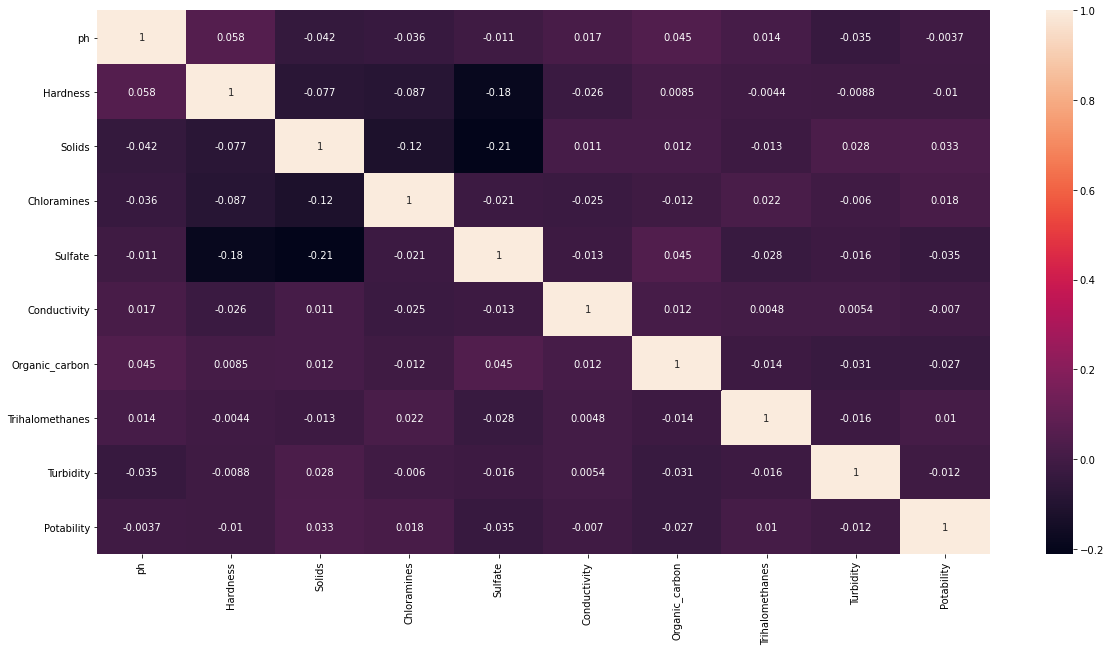

In [127]:
# plotting heatmap for obeserving correlation
sns.heatmap(data = corr, annot = True)
plt.gcf().set_size_inches(20,10)

### Summary of dataset features
- Total instances - 2756
- Total columns - 10

### Data Pre-Processing

In [128]:
# now lets check for missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

Sulfate            659
ph                 404
Trihalomethanes    140
Potability           0
Turbidity            0
Organic_carbon       0
Conductivity         0
Chloramines          0
Solids               0
Hardness             0
dtype: int64

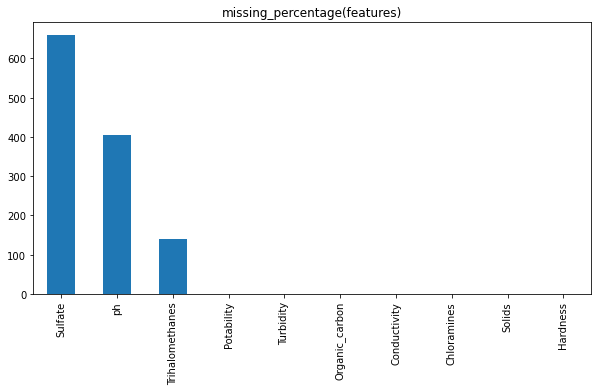

<Figure size 432x288 with 0 Axes>

In [129]:
#lets plot graph to see the missing values
plt.figure(figsize= (10,5))
(missing_values).plot(kind = 'bar')
plt.title(label = 'missing_percentage(features)')
plt.show()
plt.savefig('missing_values.jpg')

Text(0.5, 1.0, 'Trihalomethanes')

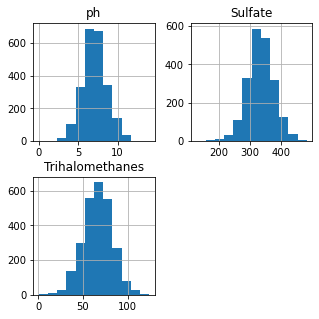

In [130]:
ax = df[['ph', 'Sulfate','Trihalomethanes']].hist(figsize=(5,5), bins = 12)
ax[0,0].set_title('ph')
ax[0,1].set_title('Sulfate')
ax[1,0].set_title('Trihalomethanes')

In [131]:
# lets check for dupliacte values
df.duplicated().sum()

0

### Summary of Preprocessing
- From the hist plot we can observe, that feature ph is normally distributed where as Sulfate and Trihalomethanes are slightly skewd to the left
- If the feature is slightly skewed then median is best for imputation and if the feature is normally distributed then both mean/median both are good for imputation
- Consequenlty I'll be filling ph with median and Sulfate and Trihalomethanes with mean

In [132]:
print('median:', df['ph'].mean())
print('mean:', df['ph'].median())

median: 7.080066937933669
mean: 7.038720919


In [133]:
df['ph'].fillna(value = df['ph'].median(), inplace = True)
df['Sulfate'].fillna(value = df['Sulfate'].mean(), inplace = True)
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean(), inplace = True)

### Univariate analysis for target feature

In [134]:
df['Potability'].value_counts()

0    1478
1    1278
Name: Potability, dtype: int64

In [135]:
class_0, class_1 = df['Potability'].value_counts(normalize = True)
print(f'Class 0 before imbalance:', round(class_0 *100,1) ,'%')
print(f'Class 1 before imbalance:', round(class_1 *100,1) ,'%')

Class 0 before imbalance: 53.6 %
Class 1 before imbalance: 46.4 %


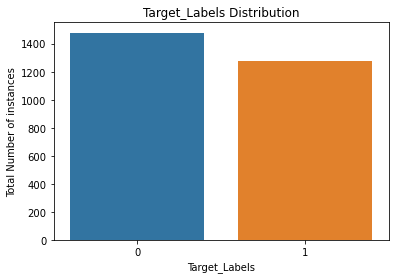

In [136]:
sns.countplot(x = 'Potability', data = df)
plt.title('Target_Labels Distribution')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Target_Labels Distributions.jpg')

### Imbalancing the target feature
- As mentioned in the project small imbalances of one class is fine, I'll proceed with further step 'making the target feature imbalance'

In [137]:
X = df.loc[:, df.columns != 'Potability']
y = df.loc[:,'Potability'].copy() # lets work with the copy without disturbing the original target feature

In [138]:
X.shape, y.shape

((2756, 9), (2756,))

In [139]:
# 65% imbalance
X_65, y_65 = make_imbalance(X, y, sampling_strategy={0:689 , 1: 1278}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_65)}')

Distribution after imbalancing: Counter({1: 1278, 0: 689})


In [140]:
class0 , class1 = y_65.value_counts(normalize = True)
print(f'Class 0 after imbalance:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance:', round(class1 *100,1) ,'%')

Class 0 after imbalance: 65.0 %
Class 1 after imbalance: 35.0 %


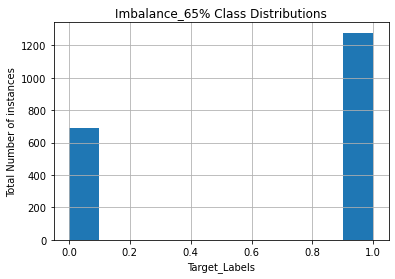

In [141]:
# 65% imbalance target feature
y_65.hist() 
plt.title('Imbalance_65% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_65% Class Distributions.jpg')

In [142]:
# Stratified Kfold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [143]:
skf = StratifiedKFold(n_splits=10, random_state = None)
rf_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1, random_state = 42) #rf model

In [144]:
#Training with 65% imbalance surrogate
skf.get_n_splits(X_65, y_65)
score = []
precision = []
recall = []
for train_index, test_index in skf.split(X_65, y_65):
    #print('Train:' , train_index, 'Validation: ', test_index)
    x_train, x_test = X_65.iloc[train_index], X_65.iloc[test_index]
    y_train, y_test = y_65.iloc[train_index], y_65.iloc[test_index]
    rf_clf.fit(x_train, y_train)
    acc = accuracy_score(y_test, rf_clf.predict(x_test))
    precision_s = precision_score(y_test, rf_clf.predict(x_test),average='macro')
    recall_s = recall_score(y_test, rf_clf.predict(x_test))
    score.append(acc)
    precision.append(precision_s)
    recall.append(recall_s)

In [145]:
#Metrics @ 65%
print('Mean Accuracy Score: {}   Accuracy std: {}'.format(np.array(score).mean(), np.array(score).std()))
print('Mean Precision Score: {}   Precision std: {}'.format(np.array(precision).mean(),  np.array(precision).std()))
print('Mean Recall Score: {}   Recall std: {}'.format(np.array(recall).mean(),  np.array(recall).std()))

Mean Accuracy Score: 0.6796850719983424   Accuracy std: 0.026323576164087772
Mean Precision Score: 0.6561437844207235   Precision std: 0.0652701645934615
Mean Recall Score: 0.9287832185039371   Recall std: 0.02391432992523047


In [146]:
#Training with balanced dataset
skf.get_n_splits(X, y)
score = []
precision = []
recall = []
for train_index, test_index in skf.split(X, y):
    #print('Train:' , train_index, 'Validation: ', test_index)
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_clf.fit(x_train, y_train)
    acc = accuracy_score(y_test, rf_clf.predict(x_test))
    precision_s = precision_score(y_test, rf_clf.predict(x_test),average='macro')
    recall_s = recall_score(y_test, rf_clf.predict(x_test))
    score.append(acc)
    precision.append(precision_s)
    recall.append(recall_s)

In [147]:
#Metrics @ 50%
print('Mean Accuracy Score: {}   Accuracy std: {}'.format(np.array(score).mean(), np.array(score).std()))
print('Mean Precision Score: {}   Precision std: {}'.format(np.array(precision).mean(),  np.array(precision).std()))
print('Mean Recall Score: {}   Recall std: {}'.format(np.array(recall).mean(),  np.array(recall).std()))

Mean Accuracy Score: 0.6114097496706192   Accuracy std: 0.04640573119158402
Mean Precision Score: 0.6100956128450366   Precision std: 0.05104695627782986
Mean Recall Score: 0.4725947342519685   Recall std: 0.0728412398693633


In [148]:
# 75% imbalance
X_75, y_75 = make_imbalance(X, y, sampling_strategy={0:425 , 1: 1278}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_75)}')

Distribution after imbalancing: Counter({1: 1278, 0: 425})


In [149]:
class0 , class1 = y_75.value_counts(normalize = True)
print(f'Class 0 after imbalance_75%:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance_75%:', round(class1 *100,1) ,'%')

Class 0 after imbalance_75%: 75.0 %
Class 1 after imbalance_75%: 25.0 %


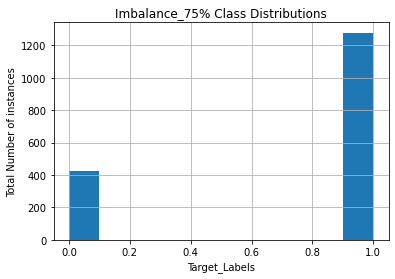

In [150]:
# 75% imbalance target feature
y_75.hist() 
plt.title('Imbalance_75% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_75% Class Distributions.jpg')

In [151]:
#Training with 75% imbalance surrogate
skf.get_n_splits(X_75, y_75)
score = []
precision = []
recall = []
for train_index, test_index in skf.split(X_75, y_75):
    #print('Train:' , train_index, 'Validation: ', test_index)
    x_train, x_test = X_75.iloc[train_index], X_75.iloc[test_index]
    y_train, y_test = y_75.iloc[train_index], y_75.iloc[test_index]
    rf_clf.fit(x_train, y_train)
    acc = accuracy_score(y_test, rf_clf.predict(x_test))
    precision_s = precision_score(y_test, rf_clf.predict(x_test),average='macro')
    recall_s = recall_score(y_test, rf_clf.predict(x_test))
    score.append(acc)
    precision.append(precision_s)
    recall.append(recall_s)

In [152]:
#Metrics @ 75%
print('Mean Accuracy Score: {}   Accuracy std: {}'.format(np.array(score).mean(), np.array(score).std()))
print('Mean Precision Score: {}   Precision std: {}'.format(np.array(precision).mean(),  np.array(precision).std()))
print('Mean Recall Score: {}   Recall std: {}'.format(np.array(recall).mean(),  np.array(recall).std()))

Mean Accuracy Score: 0.7621843825249398   Accuracy std: 0.010243832010403913
Mean Precision Score: 0.7606218573504216   Precision std: 0.1049993934374923
Mean Recall Score: 0.9906003937007875   Recall std: 0.007674877889582425


In [153]:
X_90, y_90 = make_imbalance(X, y, sampling_strategy={0:142 , 1: 1278}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_90)}')

Distribution after imbalancing: Counter({1: 1278, 0: 142})


In [154]:
class0 , class1 = y_90.value_counts(normalize = True)
print(f'Class 0 after imbalance_90%:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance_90%:', round(class1 *100,1) ,'%')

Class 0 after imbalance_90%: 90.0 %
Class 1 after imbalance_90%: 10.0 %


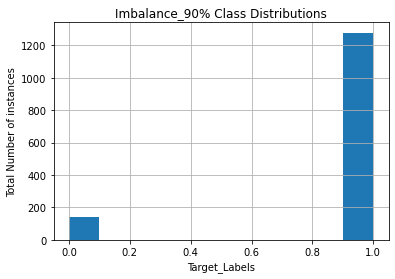

In [155]:
# 90% imbalance target feature plot
y_90.hist() 
plt.title('Imbalance_90% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_90% Class Distributions.jpg')

In [156]:
#Training with 90% imbalance surrogate
skf.get_n_splits(X_90, y_90)
score = []
precision = []
recall = []
for train_index, test_index in skf.split(X_90, y_90):
    #print('Train:' , train_index, 'Validation: ', test_index)
    x_train, x_test = X_90.iloc[train_index], X_90.iloc[test_index]
    y_train, y_test = y_90.iloc[train_index], y_90.iloc[test_index]
    rf_clf.fit(x_train, y_train)
    acc = accuracy_score(y_test, rf_clf.predict(x_test))
    precision_s = precision_score(y_test, rf_clf.predict(x_test),average='macro')
    recall_s = recall_score(y_test, rf_clf.predict(x_test))
    score.append(acc)
    precision.append(precision_s)
    recall.append(recall_s)

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Un

In [157]:
#Metrics @ 90%
print('Mean Accuracy Score: {}'.format(np.array(score).mean()))
print('Mean Precision Score: {}'.format(np.array(precision).mean()))
print('Mean Recall Score: {}'.format(np.array(recall).mean()))

Mean Accuracy Score: 0.8992957746478873
Mean Precision Score: 0.44996254120467494
Mean Recall Score: 0.9992125984251968


### Part 3

In [158]:
x_train = []
x_test = []
y_train = []
y_test = []
skf.get_n_splits(X_65, y_65)
for train_index, test_index in skf.split(X_65, y_65):
    #print('Train:' , train_index, 'Validation: ', test_index)
    xtrain, xtest = X_65.iloc[train_index], X_65.iloc[test_index]
    ytrain, ytest = y_65.iloc[train_index], y_65.iloc[test_index]
    x_train.append(xtrain)
    x_test.append(xtest)
    y_train.append(ytrain)
    y_test.append(ytest)

In [159]:
x_train[0].head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
69,6.157443,155.835706,25937.71144,8.163144,298.192406,533.288351,14.356496,68.120761,4.770154
70,4.405327,169.742537,15039.71041,6.308198,352.917733,424.251162,14.441754,79.169597,4.086867
71,9.347345,201.632836,13749.59604,7.333742,322.044667,512.446305,12.434716,43.827119,3.615151
72,2.690831,151.782906,30204.54674,6.053072,303.702409,377.198273,14.121049,45.602992,4.650034
73,7.009602,220.561996,18628.69683,6.781680,334.135731,397.996103,14.808674,77.763534,3.121945


## Part 4

### Elbow Method

In [160]:
wss_score = [[] for col in range(9) for row in range(9)]
for i in range(0,9):
    for j in range(2, 12):
        kmeans=cluster.KMeans(n_clusters=j,init="k-means++")
        kmeans=kmeans.fit(x_train[i])
        wss_iter = kmeans.inertia_
        wss_score[i].append(wss_iter)

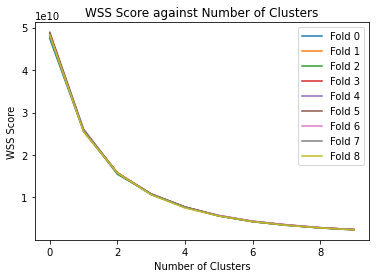

In [161]:
for i in range(0,9):
    plt.plot(wss_score[i], label= 'Fold {}'.format(i))
    plt.xlabel('Number of Clusters')
    plt.ylabel('WSS Score')
    plt.title('WSS Score against Number of Clusters')
    plt.legend()
    plt.savefig('Elbow_plot_water_potabilty.jpg')

- 2 clusters identified using Elbow method

In [162]:
plt.savefig("output_wine_elbow.png")

<Figure size 432x288 with 0 Axes>

## Silhouette method

In [163]:
from sklearn.metrics import silhouette_score

In [164]:
scores_arr = [[] for col in range(9) for row in range(9)]
for i in range(0,9):
    for j in range(2, 12):
        labels=cluster.KMeans(n_clusters=j,init="k-means++",random_state=200).fit(x_train[i]).labels_
        scores = silhouette_score(x_train[i],labels,metric="euclidean",sample_size=1000,random_state=200)
        scores_arr[i].append(scores)

In [165]:
for i in range(0,9):
    max_value = max(scores_arr[i])
    max_index = scores_arr[i].index(max_value)
    print('For Cluster {}, the maximum score is at index: {}'.format(i, max_index))

For Cluster 0, the maximum score is at index: 0
For Cluster 1, the maximum score is at index: 0
For Cluster 2, the maximum score is at index: 0
For Cluster 3, the maximum score is at index: 0
For Cluster 4, the maximum score is at index: 0
For Cluster 5, the maximum score is at index: 0
For Cluster 6, the maximum score is at index: 0
For Cluster 7, the maximum score is at index: 0
For Cluster 8, the maximum score is at index: 0


In [166]:
#*****CHANGE MANUALLY DURING EACH ITERATION*****#

#num_of_clusters=8 

- The maximum Silhouette score is found at index 0 for all the folds which corresponds to 2 clusters

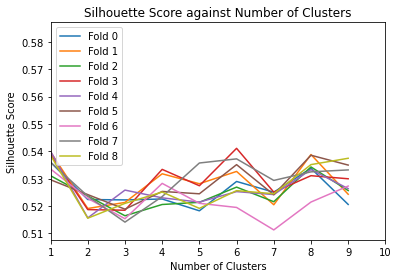

In [167]:
# Visualizing Silhouette scores for the different folds
for i in range(0,9):
    plt.plot(scores_arr[i], label= 'Fold {}'.format(i))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score against Number of Clusters')
    plt.xlim([1, 10])
    plt.legend()
    plt.savefig('Silhouette_plot_water_potability.jpg')

### K-Means

In [168]:
clusters_arr = [[] for col in range(9) for row in range(len(x_train[1]))]
kmeans = cluster.KMeans(n_clusters=2 ,init="k-means++")
for i in range(0,9):
    kmeans = kmeans.fit(x_train[i])
    clusters = kmeans.labels_
    clusters_arr[i].append(clusters)

In [169]:
dftest = x_train[8]
dftest['pred_labels'] = np.transpose(clusters_arr[8])
dftest['true_labels'] = y_train[8]
dftest.head()

<ipython-input-169-f92b37f6f9c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['pred_labels'] = np.transpose(clusters_arr[8])
<ipython-input-169-f92b37f6f9c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['true_labels'] = y_train[8]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,pred_labels,true_labels
0,7.038721,210.204921,26894.14489,4.312762,329.146438,344.515150,15.109191,66.359321,4.903914,0,0
1,7.038721,184.020029,13361.22602,9.258656,335.089993,467.444154,19.581926,80.084233,4.411058,1,0
2,9.735889,209.761513,10897.15029,6.106567,358.193121,449.367790,13.911645,47.100186,5.573210,1,0
3,7.257931,187.765622,24354.33517,7.196254,334.135731,346.291785,10.892953,61.561166,4.266923,0,0
4,6.971577,185.906938,27959.98787,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0,0


In [170]:
dftest1 = dftest[dftest['pred_labels'].isin([1])]
dftest1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,pred_labels,true_labels
1,7.038721,184.020029,13361.226020,9.258656,335.089993,467.444154,19.581926,80.084233,4.411058,1,0
2,9.735889,209.761513,10897.150290,6.106567,358.193121,449.367790,13.911645,47.100186,5.573210,1,0
5,6.344095,164.817207,14973.297360,10.707016,316.144450,337.219448,19.411699,64.384970,3.843484,1,0
6,10.191665,211.566904,13630.047310,6.524476,297.049066,468.371387,17.411747,72.720573,3.403423,1,0
7,10.188433,286.567991,7105.800709,9.840540,321.686059,437.879508,12.871599,78.732055,4.635243,1,0


In [171]:
accuracy_score(dftest1['true_labels'], dftest1['pred_labels'])

0.6392988929889298

In [172]:
dftest1['true_labels'].value_counts() #There are 33 minority labels(belong to cluster 0)

1    693
0    391
Name: true_labels, dtype: int64

In [173]:
dftest_1 = dftest1[dftest1['true_labels'].isin([0])]
dftest_1['true_labels'].value_counts()

0    391
Name: true_labels, dtype: int64

In [174]:
dftest0 = dftest[dftest['pred_labels'].isin([0])]
dftest0.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,pred_labels,true_labels
0,7.038721,210.204921,26894.14489,4.312762,329.146438,344.515150,15.109191,66.359321,4.903914,0,0
3,7.257931,187.765622,24354.33517,7.196254,334.135731,346.291785,10.892953,61.561166,4.266923,0,0
4,6.971577,185.906938,27959.98787,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0,0
8,7.038721,207.391097,25110.03763,6.329791,345.592635,420.219104,22.346415,92.327760,2.739235,0,0
12,7.468617,240.345305,36701.97435,4.536413,339.221351,453.211366,16.106515,67.952496,3.384179,0,0


In [175]:
dftest_0 = dftest0[dftest0['true_labels'].isin([1])]
dftest_0['true_labels'].value_counts()

1    458
Name: true_labels, dtype: int64

In [176]:
#Combining the datasets
df_new = pd.concat([dftest_0, dftest_1], axis=0)
df_new.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,pred_labels,true_labels
690,7.657542,230.820008,35056.23223,7.656807,364.130141,305.629409,18.481396,72.205075,4.792527,0,1
692,7.038721,176.779947,24793.45568,6.394342,312.359148,377.066286,10.070192,50.124122,4.641041,0,1
696,6.382315,212.838514,24259.75167,7.360504,334.135731,342.581444,12.332979,67.748991,2.881370,0,1
698,3.551579,323.124000,38969.38899,8.925515,334.135731,514.762918,10.160303,71.099999,3.965994,0,1
699,7.493844,197.331291,26678.39288,7.198435,269.892347,375.503062,13.134917,69.590806,3.819947,0,1


In [177]:
df_new['true_labels'].value_counts()

1    458
0    391
Name: true_labels, dtype: int64

In [178]:
#Training Random forest classifier
del df_new['pred_labels']

In [179]:
df_new.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,true_labels
690,7.657542,230.820008,35056.23223,7.656807,364.130141,305.629409,18.481396,72.205075,4.792527,1
692,7.038721,176.779947,24793.45568,6.394342,312.359148,377.066286,10.070192,50.124122,4.641041,1
696,6.382315,212.838514,24259.75167,7.360504,334.135731,342.581444,12.332979,67.748991,2.881370,1
698,3.551579,323.124000,38969.38899,8.925515,334.135731,514.762918,10.160303,71.099999,3.965994,1
699,7.493844,197.331291,26678.39288,7.198435,269.892347,375.503062,13.134917,69.590806,3.819947,1


In [180]:
x = df_new.loc[:, df_new.columns != 'true_labels']
y = df_new['true_labels']

In [181]:
rf_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1, random_state = 42)
rf_clf.fit(x, y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [182]:
print('RF Train accuracy: {}'.format(accuracy_score(y, rf_clf.predict(x))))

RF Train accuracy: 1.0


In [183]:
## Assigning clusters to unseen fold
kmeans = cluster.KMeans(n_clusters=2 ,init="k-means++")
kmeans = kmeans.fit(x_train[8])
clusters = kmeans.labels_
clusters

array([1, 0, 0, ..., 0, 1, 0])

In [184]:
accuracy_score(y_train[8],clusters)

0.47939017504234893

In [185]:
df_x = x_train[8]
df_x['labels'] = clusters
print(df_x.shape)
df_x.head()

(1771, 12)


<ipython-input-185-840ddb461245>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['labels'] = clusters


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,pred_labels,true_labels,labels
0,7.038721,210.204921,26894.14489,4.312762,329.146438,344.515150,15.109191,66.359321,4.903914,0,0,1
1,7.038721,184.020029,13361.22602,9.258656,335.089993,467.444154,19.581926,80.084233,4.411058,1,0,0
2,9.735889,209.761513,10897.15029,6.106567,358.193121,449.367790,13.911645,47.100186,5.573210,1,0,0
3,7.257931,187.765622,24354.33517,7.196254,334.135731,346.291785,10.892953,61.561166,4.266923,0,0,1
4,6.971577,185.906938,27959.98787,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0,0,1


In [186]:
arr = []
for i in range(len(df_x)):
    res = df_x['labels'].iloc[i] == df_x['true_labels'].iloc[i]
    arr.append(res)

In [187]:
df_x['bool'] = arr
df_x = df_x[df_x['bool'].isin([False])]
df_x.shape

<ipython-input-187-9f1c0fa92ac7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['bool'] = arr


(922, 13)

In [188]:
df_x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,pred_labels,true_labels,labels,bool
0,7.038721,210.204921,26894.14489,4.312762,329.146438,344.515150,15.109191,66.359321,4.903914,0,0,1,False
3,7.257931,187.765622,24354.33517,7.196254,334.135731,346.291785,10.892953,61.561166,4.266923,0,0,1,False
4,6.971577,185.906938,27959.98787,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0,0,1,False
8,7.038721,207.391097,25110.03763,6.329791,345.592635,420.219104,22.346415,92.327760,2.739235,0,0,1,False
12,7.468617,240.345305,36701.97435,4.536413,339.221351,453.211366,16.106515,67.952496,3.384179,0,0,1,False


In [189]:
del df_x['pred_labels']
del df_x['labels']
del df_x['bool']

In [190]:
## Random Forest
x = df_x.loc[:, df_x.columns != 'true_labels']
y = df_x['true_labels']
accuracy_score(y, rf_clf.predict(x))

0.0